# Exercise 2. Logistic Regression

*Solution Author: Brian Pardo*

*These are solutions to [programming exercise 2](https://www.coursera.org/learn/machine-learning/programming/ixFof/logistic-regression) for Coursera's Machine Learning course by Andrew Ng.*

In this exercise, we will implement a logistic regression classifier for two data sets without and with regularization.

## Part 1. Logistic Regression

In this part of the exercise, we will use a logistic regression model to predict whether a student gets admitted to a university. Suppose that we are the administrator of a university department and want to determine each applicant's chance of admission based on their results on two exams. We have historical data from previous applicants that we can use as a training set for logistic regression. For each training example, we have the applicant's scores on two exams and the admissions decision.
    We will build a classification model that estimates an applicant's probability of admission based the scores from those two exams. First, let's load the data.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from scipy.optimize import minimize
from numpy import matmul as mm

mydata = np.loadtxt('ex2data1.txt',delimiter=',')
mydata[:5,:]

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ]])

In [2]:
m = len(mydata)
X = np.append(np.ones((m,1)),mydata[:,:2],axis=1)
y = np.expand_dims(mydata[:,2],axis=1)

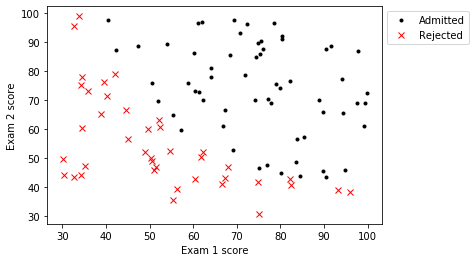

In [3]:
admit = mydata[mydata[:,2]==1]; reject = mydata[mydata[:,2]==0];
fig1, ax1 = plt.subplots()
ax1.plot(admit[:,0], admit[:,1], '.', color='k', label = 'Admitted')
ax1.plot(reject[:,0], reject[:,1], 'x', color='r', label = 'Rejected')
ax1.set_xlabel('Exam 1 score')
ax1.set_ylabel('Exam 2 score')
ax1.legend(bbox_to_anchor=(1,1), loc='upper left');

In [4]:
def sigmoid(z):
    return np.power(1+np.exp(-z),-1)

# let's make sure that sigmoid(0)=0.5
sigmoid(0)

0.5

In [5]:
#initialize theta
theta = np.zeros((len(X[0]),))

In [6]:
def costFunction(theta, x, y, lam = 0):
    m = len(x)
    theta=theta.reshape(-1,1)
    J = (1/m)*(-mm(y.T,np.log(sigmoid(mm(x,theta))))
               -mm((1-y).T,np.log(1-sigmoid(mm(x,theta)))))
    Jreg = (lam/(2*m))*np.sum(theta[1:,:]**2)
    grad = (1/m)*mm(x.T,sigmoid(mm(x,theta))-y).flatten()
    gradreg = (lam/m)*np.append([0],theta[1:,:])
    return float(J+Jreg), (grad+gradreg)
    
# for a hypothesis with theta = [0,0,0] and theta = [-24; 0.2; 0.2]
costFunction(theta,X,y)

test_theta = np.array([[-24], [0.2], [0.2]])
costFunction(test_theta,X,y)

(0.2183301938265977, array([0.04290299, 2.56623412, 2.64679737]))

In [7]:
# Initialize theta to random small values
theta0 = np.random.rand(3,)/1000

# Optimize the cost using the optimize.minimize function
optim = minimize(costFunction, theta0, (X,y), jac=True, method='TNC', options={'maxiter': 100})
J, theta = optim.fun, optim.x
J, theta

(0.20349771748256099, array([-25.17167037,   0.20631492,   0.20155485]))

In [8]:
def predict(x, theta):
    return mm(x,theta.reshape(-1,1))>=0

In [9]:
p = predict(X,theta)
np.mean(p==y)

0.89

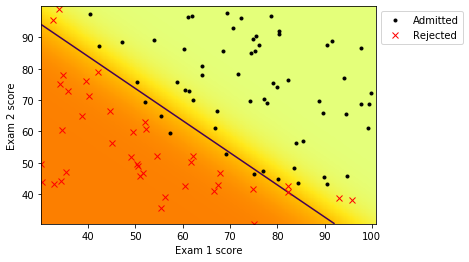

In [10]:
# Add a contour plot
delta = 0.25
x1 = np.arange(X[:,1].min(), X[:,1].max()+1, delta).reshape(-1,1)
x2 = np.arange(X[:,2].min(), X[:,2].max()+1, delta).reshape(-1,1)
X1, X2 = np.meshgrid(x1, x2)
z = np.empty(np.shape(X1))
for i in range(len(X1)):
    for j in range(len(X1[0])):
        Xtemp = np.array([[1,X1[i,j],X2[i,j]]])
        z[i,j] = sigmoid(mm(Xtemp,theta))
ax1.contour(X1,X2,z,[0.5])
ax1.pcolormesh(X1, X2, -z, cmap='Wistia')

# Show figure
fig1

## Part 2. Regularized Logistic Regression

We will now implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). Suppose we have test results for some microchips on two different tests. From these two tests, we would like to determine whether the microchips should be accepted or rejected. To help you make the decision, we have a dataset of test results on past microchips, from which we can build a logistic regression model.

Let's first import and visualize the data.

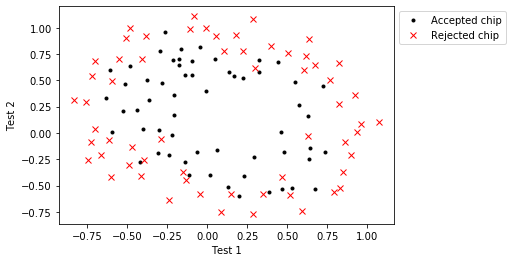

In [42]:
# import the data
mydata2 = np.loadtxt('ex2data2.txt',delimiter=',')
x = mydata2[:,:-1]
y = np.expand_dims(mydata2[:,-1],axis=1)

# Plot data
fig2, ax2 = plt.subplots()
goodchip = x[(y==1).flatten()]; badchip = x[(y==0).flatten()]
ax2.plot(goodchip[:,0],goodchip[:,1],'.k', label = 'Accepted chip')
ax2.plot(badchip[:,0],badchip[:,1],'xr', label = 'Rejected chip')
ax2.set_xlabel('Test 1')
ax2.set_ylabel('Test 2')
ax2.legend(bbox_to_anchor=(1,1), loc='upper left');

In [24]:
def mapFeatures(x1, x2, degree):
    out = np.ones((len(x1),1))
    for deg in range(1, degree+1):
        for n in range(0, deg+1):
            out = np.append(out,(x1**n)*(x2**(deg-n)),axis=1)
    return out
            
Xpoly = mapFeatures(x[:,0].reshape(-1,1),x[:,1].reshape(-1,1),6)

# Try some initial theta values
initial_theta = np.zeros(len(Xpoly[0]),)
costFunction(initial_theta, Xpoly, y, 1)

initial_theta = np.ones(len(Xpoly[0]),)
costFunction(initial_theta, Xpoly, y, 10);

In [41]:
initial_theta = np.zeros(len(Xpoly[0]),)
lam = 1
optim = minimize(costFunction, initial_theta, (Xpoly,y,lam), 
                 jac=True, method='TNC', options={'maxiter': 100})

J = optim.fun
theta = optim.x

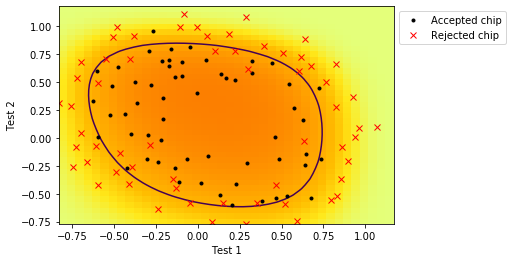

In [43]:
# Add a contour plot
delta = .05
x1 = np.arange(x[:,0].min(), x[:,0].max()+.1, delta).reshape(-1,1)
x2 = np.arange(x[:,1].min(), x[:,1].max()+.1, delta).reshape(-1,1)
X1, X2 = np.meshgrid(x1, x2)
z = np.empty(np.shape(X1))
for i in range(len(X1)):
    for j in range(len(X1[0])):
        Xtemp = mapFeatures(np.array([[X1[i,j]]]),np.array([[X2[i,j]]]),6)
        z[i,j] = sigmoid(mm(Xtemp,theta))
ax2.contour(X1,X2,z,[0.5])
ax2.pcolormesh(X1, X2, z, cmap='Wistia')

# Show figure
fig2